### Predicting Loan Defaults (Classification Problem)

#### Business Understanding
Lending Club is a company that gives personal and business loans online. People can apply for loans, and Lending Club decides how risky each loan is. Then, investors can choose which loans they want to put their money into. The main challenges are figuring out how risky a loan might be, deciding how much interest to charge, finding out which loans might not be paid back, and helping investors pick a variety of loans to spread out their risk.

#### Business Objectives
###### Improve Risk Assessment: 
Make a better system to understand how risky each loan is by looking at the borrower's information and the loan details.
###### Set the Right Interest Rates: 
Use data to suggest interest rates that are fair and make sense based on how risky the loan is.
###### Predict Loan Defaults: 
Create a tool that can guess which loans might not be paid back, helping to avoid losses.
###### Help Investors Choose: 
Offer advice to investors on how to spread their investments across different types of loans to get a good balance of risk and reward.
###### Better Loans and Policies:
Look for trends in the data to make loans and rules better for attracting more borrowers while keeping risks low.

By focusing on these goals, Lending Club can make better loan decisions, offer fair interest rates, reduce the chance of loans not being paid back, and provide better advice to investors, making the lending and investing process clearer and more effective for everyone involved.

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,accuracy_score, classification_report


In [2]:
data = pd.read_csv("data/loan.csv", low_memory=False)
data = data.dropna(subset=["loan_status"])
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', None) 

#### Exploratory Data Analysis (EDA)

The goal is to:

###### Understand the Data: 
Learn what kind of information is in your dataset and how it's organized.
###### Clean the Data: 
Fix any mistakes or missing parts in the data.
###### Find Patterns: 
Look for trends or connections between different parts of the data.
###### Find Anything Odd: 
Notice any data points that don't fit the pattern, as they could be mistakes or something interesting.
###### Ready for More Analysis: 
Decide what parts of the data might be useful for deeper study or building models.



In [4]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,2.260639e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,3.068792e-01,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.477304e+00,2.036667e+00,4.521656e+00,1.354780e+04,1.139426e+04,5.789995e+01,8.464413e-03,1.236983e+01,1.257378e+02,1.814916e+02,1.402409e+01,8.297469e+00,1.555382e+00,2.484485e+01,39.303090,7.024194e+00,35.782223,5.002082e-01,3.67

In [5]:
data.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

Data Cleaning:

1. Remove Exclusions
2. Remove Outliers.
3. Impute Missing Values

In [6]:
def map_emp_length(emp_length):
    """
    Maps employment length to a numerical value.
    """
    emp_length_mapping = {
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0.5,
        'n/a': 0
    }
    return emp_length_mapping.get(emp_length, 0)  # Default to 0 if not found

def map_state_to_region(state):
    """
    Maps a state to its corresponding region.
    """
    state_to_region = {
        **dict.fromkeys(['CA', 'OR', 'UT', 'WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID'], 'West'),
        **dict.fromkeys(['AZ', 'TX', 'NM', 'OK'], 'SouthWest'),
        **dict.fromkeys(['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN'], 'SouthEast'),
        **dict.fromkeys(['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND'], 'MidWest'),
        **dict.fromkeys(['CT', 'NY', 'PA', 'NJ', 'RI', 'MA', 'MD', 'VT', 'NH', 'ME'], 'NorthEast')
    }
    return state_to_region.get(state, 'Unknown')  # Default to 'Unknown' if not found


In [7]:
data['emp_length_int'] = data['emp_length'].apply(map_emp_length)
data['region'] = data['addr_state'].apply(map_state_to_region)

# Display the head of the DataFrame, transposed for better readability
data.head().transpose()

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,2500,30000,5000,4000,30000
funded_amnt,2500,30000,5000,4000,30000
funded_amnt_inv,2500.0,30000.0,5000.0,4000.0,30000.0
term,36 months,60 months,36 months,36 months,60 months
int_rate,13.56,18.94,17.97,18.94,16.14
installment,84.92,777.23,180.69,146.51,731.78
grade,C,D,D,D,C
sub_grade,C1,D2,D1,D2,C4


In [8]:
missing_values_count = data.isnull().sum()

# Calculating the percentage of missing values in each column
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Combining both counts and percentages into a single DataFrame for a clearer view
missing_values_df = pd.DataFrame({'Missing Values': missing_values_count, 'Percentage (%)': missing_values_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_values_df_sorted = missing_values_df.sort_values(by='Percentage (%)', ascending=False)

missing_values_df_sorted



,Missing Values,Percentage (%)
id,2260668,100.000000
member_id,2260668,100.000000
url,2260668,100.000000
orig_projected_additional_accrued_interest,2252242,99.627278
hardship_dpd,2250055,99.530537
hardship_status,2250055,99.530537
deferral_term,2250055,99.530537
hardship_amount,2250055,99.530537
hardship_start_date,2250055,99.530537
hardship_end_date,2250055,99.530537


In [9]:
# Identify columns where the percentage of missing values is greater than 80%
columns_to_drop = missing_values_percentage[missing_values_percentage > 50].index

# Drop these columns from the DataFrame
data.drop(columns=columns_to_drop, inplace=True)

# Verify the columns have been dropped
print(data.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'emp_length_int', 'region'], dtype='object', length=103)


In [10]:
# Drop the columns which add no value to the outcome
no_value_columns = [
    'collection_recovery_fee',
    'last_pymnt_amnt',
    'out_prncp',
    'out_prncp_inv',
    'recoveries',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp'
]

data.drop(no_value_columns, axis=1, inplace=True)

In [11]:
missing_values_count = data.isnull().sum()

# Calculating the percentage of missing values in each column
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Combining both counts and percentages into a single DataFrame for a clearer view
missing_values_df = pd.DataFrame({'Missing Values': missing_values_count, 'Percentage (%)': missing_values_percentage})

# Sorting the DataFrame by the percentage of missing values in descending order
missing_values_df_sorted = missing_values_df.sort_values(by='Percentage (%)', ascending=False)

missing_values_df_sorted

,Missing Values,Percentage (%)
il_util,1068850,47.280273
mths_since_rcnt_il,909924,40.250227
all_util,866348,38.322655
total_cu_tl,866130,38.313012
inq_last_12m,866130,38.313012
open_acc_6m,866130,38.313012
open_il_12m,866129,38.312968
open_il_24m,866129,38.312968
total_bal_il,866129,38.312968
open_act_il,866129,38.312968


In [12]:
#drop repeated features

data.drop(['emp_length','emp_title','title','zip_code','issue_d','earliest_cr_line','addr_state'], axis=1, inplace=True)

# unique values a categorical variable (object) has
data.select_dtypes(include=["object"]).nunique()  #include/exclude

term                      2
grade                     7
sub_grade                35
home_ownership            6
verification_status       3
loan_status               9
pymnt_plan                2
purpose                  14
initial_list_status       2
last_pymnt_d            135
last_credit_pull_d      140
application_type          2
hardship_flag             2
disbursement_method       2
debt_settlement_flag      2
region                    5
dtype: int64

In [13]:
distinct_terms = data['term'].unique()
print("Distinct values of 'term':", distinct_terms)

Distinct values of 'term': [' 36 months' ' 60 months']


In [14]:
# Convert 'term' into numeric by extracting the number of months
data['term'] = data['term'].str.extract('(\d+)').astype(float)

# Verifying the conversion by displaying the unique values of the new numeric column
unique_terms_numeric = data['term'].unique()
unique_terms_numeric

array([36., 60.])

In [15]:
unique_loan_status_counts = data['loan_status'].value_counts()

unique_loan_status_counts

loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64

In [16]:
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if x in ['Fully Paid', 'Current','Does not meet the credit policy. Status:Fully Paid'] else 0)

In [17]:
#Imbalance check
distribution = data['loan_status'].value_counts(normalize=True) * 100  # Get percentages

distribution

loan_status
1    86.860831
0    13.139169
Name: proportion, dtype: float64

## Data is very imbalanced 
## The class distribution is heavily skewed towards one class (value 1), which makes the dataset imbalanced.


## Since the dataset is large, I am going with the approach of Undersampling the Majority Class



In [18]:
# Separate majority and minority classes
df_majority = data[data.loan_status == 1]
df_minority = data[data.loan_status == 0]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
data = pd.concat([df_minority, df_majority_downsampled])



In [19]:
#Imbalance check again
distribution = data['loan_status'].value_counts(normalize=True) * 100  # Get percentages

distribution

loan_status
0    50.0
1    50.0
Name: proportion, dtype: float64

In [20]:
total_records = data.shape[0]
print("Total number of records in the dataset:", total_records)


Total number of records in the dataset: 594066


In [21]:

# for object variables - Get the mode of next payment date and last payment date and the last date credit amount was pulled
for column in ["last_pymnt_d", "last_credit_pull_d"]:  #, 'income_category'
    data[column] = data.groupby("region")[column].transform(lambda x: x.fillna(x.mode()))

# for numerical variables
# Get the mode on the number of accounts in which the borrower is delinquent
data["pub_rec"] = data.groupby("region")["pub_rec"].transform(lambda x: x.fillna(x.median()))
# Get the mode of the total number of credit lines the borrower has
data["total_acc"] = data.groupby("region")["total_acc"].transform(lambda x: x.fillna(x.median()))

data["emp_length_int"] = data.groupby("region")["emp_length_int"].transform(lambda x: x.fillna(x.median()))

# Get the mean of the annual income depending on the region the borrower is located.
data["annual_inc"] = data.groupby("region")["annual_inc"].transform(lambda x: x.fillna(x.mean()))
# Mode of credit delinquencies in the past two years.
data["delinq_2yrs"] = data.groupby("region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))

In [22]:
data.fillna(0, inplace=True)
data.isnull().sum().max()

0

In [23]:
#Removing outliers
# Define a dictionary with columns as keys and their respective outlier thresholds as values
outlier_thresholds = {
    'annual_inc': 250000,
    'dti': 50,
    'open_acc': 40,
    'total_acc': 80,
    'revol_util': 120,
    'revol_bal': 250000
}

print("Dataset before removing outliers:", data.shape)

# Apply the outlier removal criteria for each column in the dictionary
for column, threshold in outlier_thresholds.items():
    data = data[data[column] <= threshold]

# Reset index after removing outliers
data.reset_index(drop=True, inplace=True)

print("Dataset after removing outliers:", data.shape)

# Display the head of the DataFrame, transposed for better readability
data.head().transpose()

Dataset before removing outliers: (594066, 86)
Dataset after removing outliers: (583780, 86)


,0,1,2,3,4
loan_amnt,20975,20000,9100,3525,11000
funded_amnt,20975,20000,9100,3525,11000
funded_amnt_inv,20975.0,20000.0,9100.0,3525.0,11000.0
term,36.0,36.0,36.0,36.0,60.0
int_rate,8.19,11.8,26.31,25.34,16.91
installment,659.13,662.38,368.15,140.79,272.85
grade,A,B,E,E,C
sub_grade,A4,B4,E4,E3,C5
home_ownership,MORTGAGE,RENT,OWN,MORTGAGE,MORTGAGE
annual_inc,165000.0,50000.0,62000.0,150000.0,97000.0


In [24]:
unique_loan_status_counts = data['loan_status'].value_counts()

unique_loan_status_counts

loan_status
0    292959
1    290821
Name: count, dtype: int64

In [25]:
loan_status_counts = data['loan_status'].value_counts(normalize=True) * 100

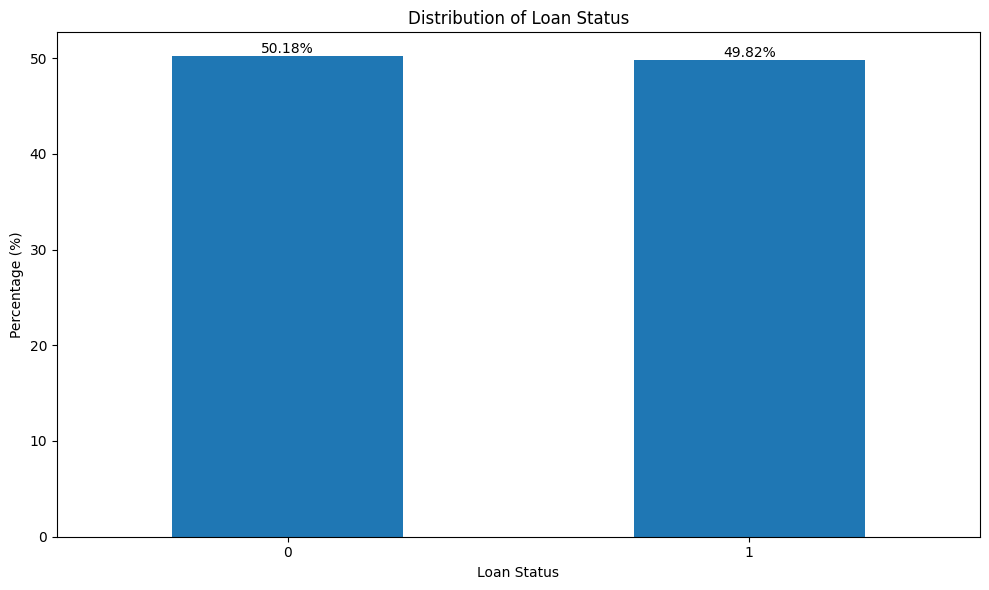

In [26]:
# Plotting the histogram with percentages
plt.figure(figsize=(10, 6))
loan_status_counts.plot(kind='bar')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=360)

# Annotating the bars with the percentage values
for index, value in enumerate(loan_status_counts):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#####
From the above distribution, we can see that there are about 11.5% of the loans which were bad(defaulted) in the overall data

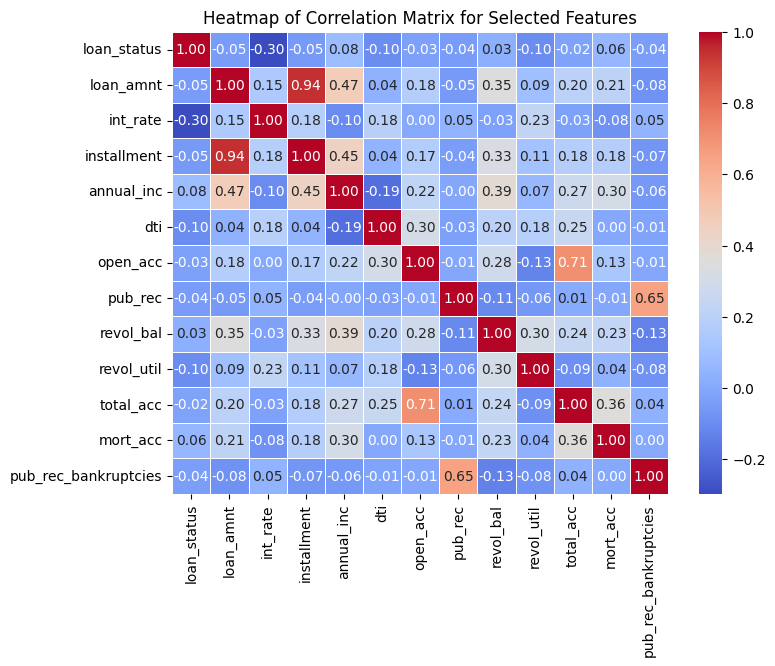

In [27]:
# Attempting with a commonly relevant subset for loan data analysis
subset_columns = ['loan_status','loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec','revol_bal', 'revol_util','total_acc','mort_acc','pub_rec_bankruptcies']

# Plotting the heatmap again with the reduced set of features
plt.figure(figsize=(8, 6))
sns.heatmap(data[subset_columns].corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Selected Features')
plt.show()


From the heatmap, there is a very good correlation 
1. Between "loan_amnt" the "installment" feature. 
2. Between loan_amnt and also the annual_inc but this might be irrevalant because higher income means higher loan amount.
3. 

installment: Monthly payment by borrower.
loan_amnt: The loan taken by borrower.
annual_inc: Borrower annual income

In [28]:
data['loan_status_str'] = data['loan_status'].map({0: 'Bad', 1: 'Good'})


In [29]:
loan_status_percentages = data['loan_status_str'].value_counts(normalize=True) * 100


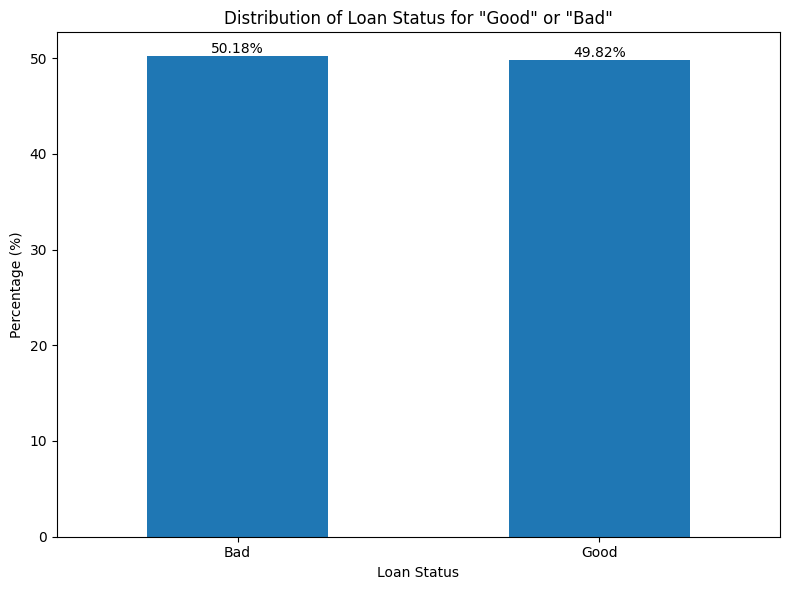

In [30]:
# Plotting
plt.figure(figsize=(8, 6))
loan_status_percentages.plot(kind='bar')
plt.title('Distribution of Loan Status for "Good" or "Bad"')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Annotate with the percentage values
for index, value in enumerate(loan_status_percentages):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### I'll Focus on variables such as loan amount, interest rate, term, grade, employment length, annual income, and debt-to-income ratio to compare the characteristics of loans that are "Charged Off" to those that are "Fully Paid"

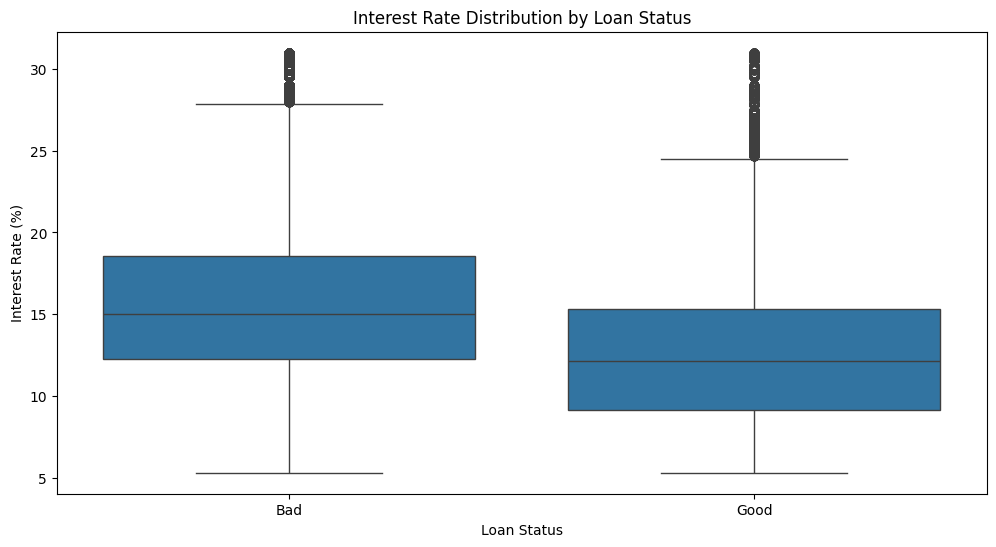

In [31]:
# Comparing Interest Rates between 'Fully Paid' and 'Charged Off'
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status_str', y='int_rate', data=data)
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()



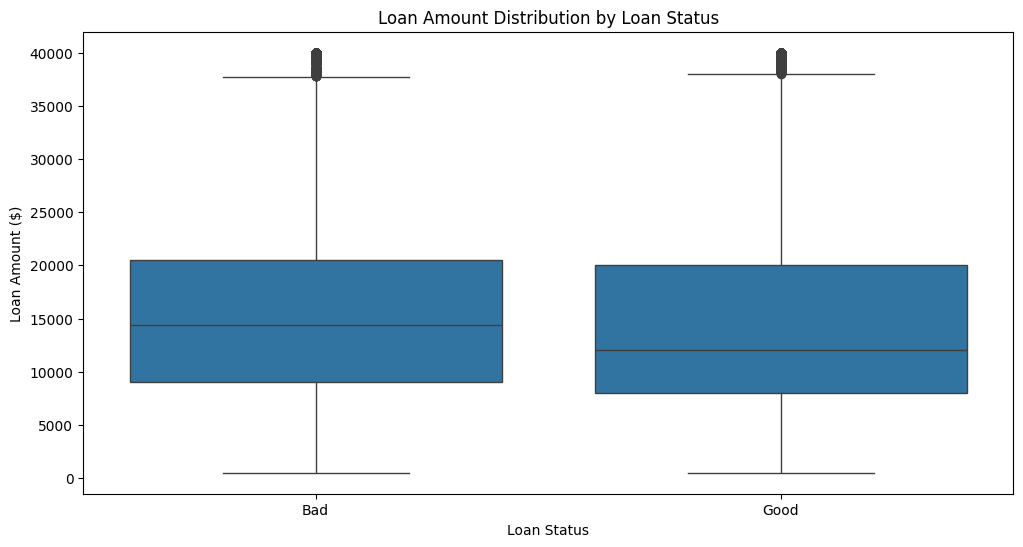

In [32]:
# Comparing Loan Amounts between 'Fully Paid' and 'Charged Off'
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status_str', y='loan_amnt', data=data)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.show()



The above observations suggest that interest rate is a significant factor in the risk of default, while the amount of the loan also has an impact but to a lesser extent. 

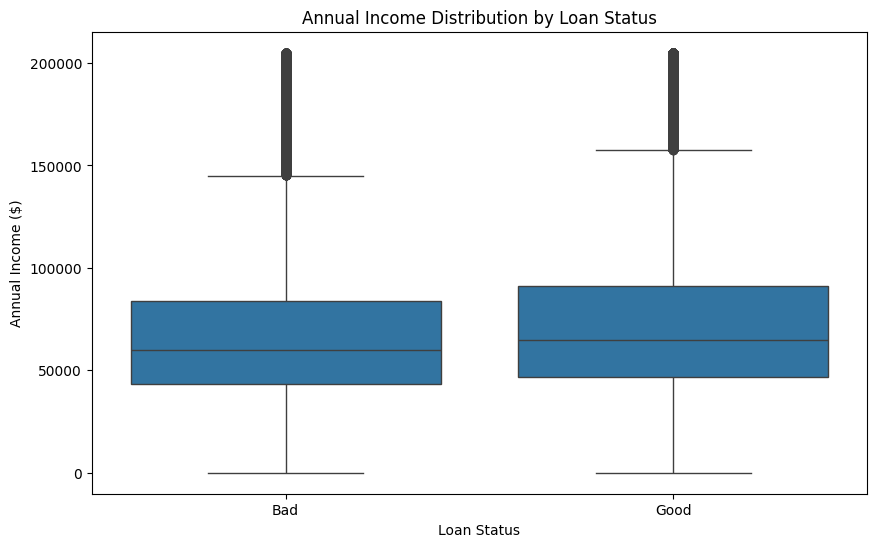

In [33]:
annual_inc_99th = data['annual_inc'].quantile(0.99)

filtered_data_for_plot = data[data['annual_inc'] <= annual_inc_99th]

# Plotting loan status against annual_inc
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status_str', y='annual_inc', data=filtered_data_for_plot)
plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')

plt.show()

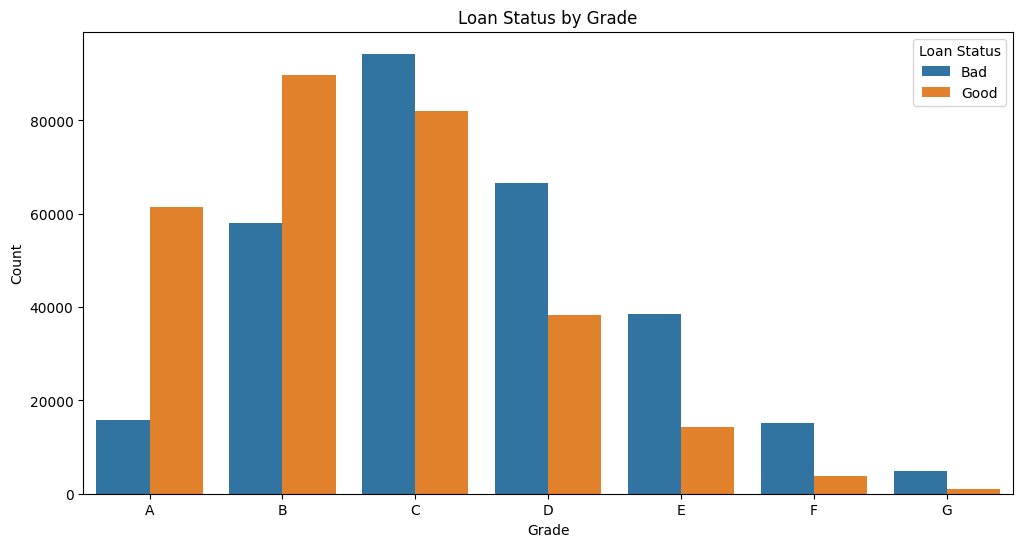

In [34]:
# Using a count plot to show loan status by grade
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status_str', data=data, order=sorted(data['grade'].unique()))
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.show()

In [35]:
status_by_grade = data.groupby(['grade', 'loan_status_str']).size().unstack(fill_value=0)

# Calculating the percentage of 'Fully Paid' vs 'Charged Off' in each grade
status_by_grade['Total'] = status_by_grade.sum(axis=1)
status_by_grade['Good (%)'] = (status_by_grade['Good'] / status_by_grade['Total']) * 100
status_by_grade['Bad (%)'] = (status_by_grade['Bad'] / status_by_grade['Total']) * 100

status_by_grade[['Good (%)', 'Bad (%)']]

loan_status_str,Good (%),Bad (%)
grade,,
A,79.606934,20.393066
B,60.795716,39.204284
C,46.538791,53.461209
D,36.513374,63.486626
E,27.102502,72.897498
F,20.370758,79.629242
G,17.780409,82.219591


The above observations suggest that loan grade is a significant factor in the risk of default, lower the grade, higher default.

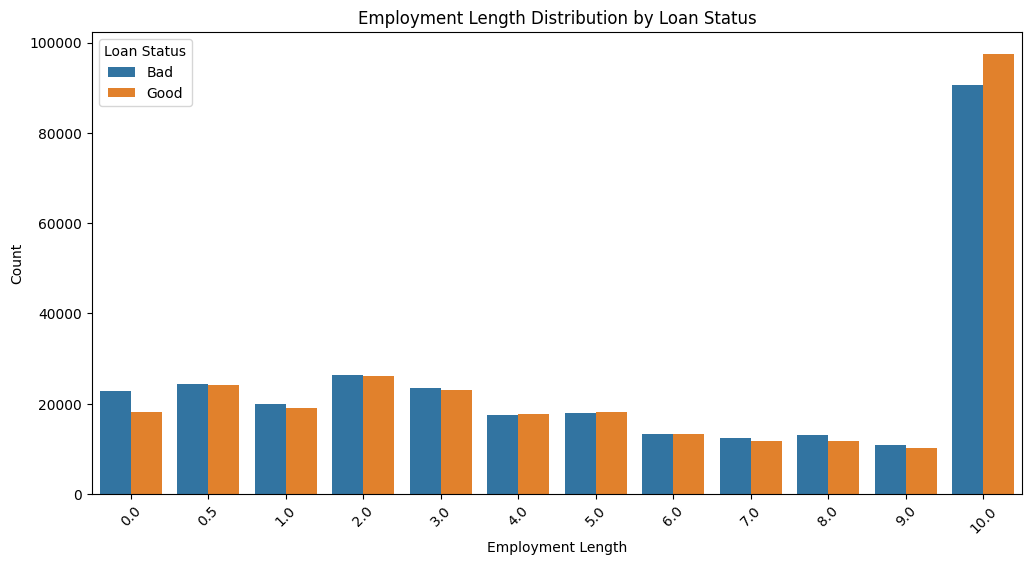

In [36]:
data_nonan = data.dropna(subset=['emp_length_int'])

# Plotting 'emp_length_int' against 'loan_status_str' for the filtered
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length_int', hue='loan_status_str', data=data_nonan,
              order=sorted(data_nonan['emp_length_int'].unique(), key=lambda x: (len(str(x)), x)))
plt.title('Employment Length Distribution by Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

In [37]:
grouped_counts = data.groupby(['emp_length_int', 'loan_status_str']).size().unstack()

grouped_counts['Total'] = grouped_counts.sum(axis=1)

#Calculate percentages for 'Fully Paid' and 'Charged Off'
grouped_counts['Good (%)'] = (grouped_counts['Good'] / grouped_counts['Total']) * 100
grouped_counts['Bad (%)'] = (grouped_counts['Bad'] / grouped_counts['Total']) * 100

print(grouped_counts[['Good (%)', 'Bad (%)']])

loan_status_str   Good (%)    Bad (%)
emp_length_int                       
0.0              44.178399  55.821601
0.5              49.672057  50.327943
1.0              48.786178  51.213822
2.0              49.878359  50.121641
3.0              49.433525  50.566475
4.0              50.354993  49.645007
5.0              50.203168  49.796832
6.0              49.990563  50.009437
7.0              48.631831  51.368169
8.0              47.442388  52.557612
9.0              48.390777  51.609223
10.0             51.800492  48.199508


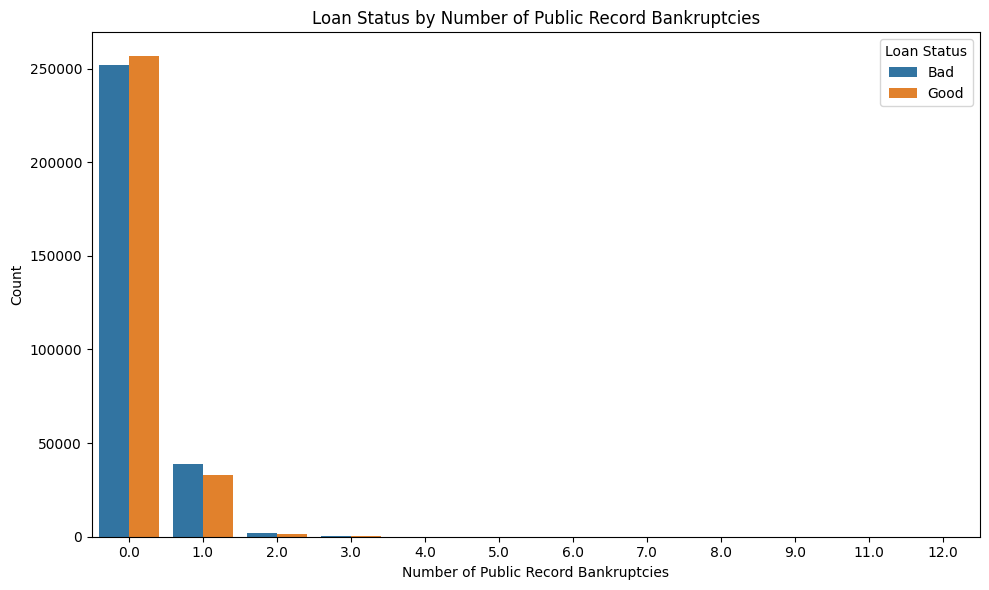

In [38]:
# Step 3: Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status_str', data=data)
plt.title('Loan Status by Number of Public Record Bankruptcies')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

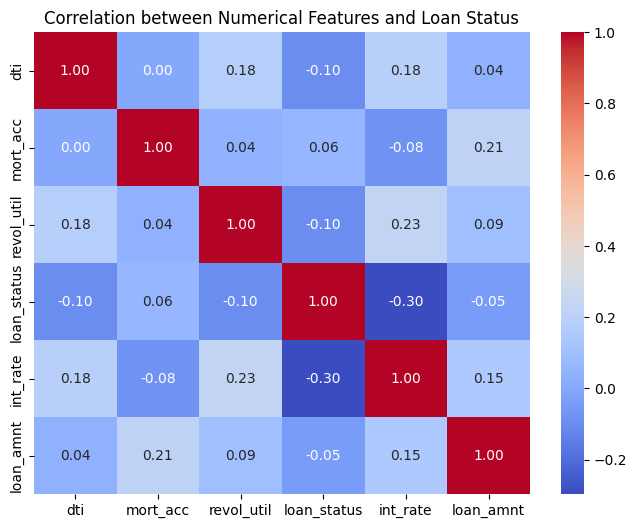

In [39]:
# Selecting relevant columns for correlation calculation
selected_columns = data[['dti', 'mort_acc', 'revol_util', 'loan_status', 'int_rate','loan_amnt']]

# Step 2: Calculate correlations
correlation_matrix = selected_columns.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numerical Features and Loan Status')
plt.show()

## Conclusion:
There are two type of features:

1. Applicant Features like occupation, employment details, etc.
2. Loan Features, like rate, amount, purpose etc.


#### The most important feature remains:
1. Interest Rate
2. DTI (Debt to Income Ratio)
3. Utilization of Revolving accounts
2. Higher Annual income means low changes of defaults.
3. Lower loan grade means high defaults.
4. If there is a past bankruptcy, then the chances are higher for the bankruptcy

In [40]:
#Handle categorical variables via encoding, first I'll try with Ordinal Encoding 
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [41]:
categorical_cols

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'region', 'loan_status_str'], dtype='object')

In [42]:
# Dictionary for ordinal encoding
ordinal_mappings = {
    'term': {'36.': 36, '60.': 60},
    'verification_status': {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2},
    'pymnt_plan': {'n': 0, 'y': 1},
    'initial_list_status': {'w': 0, 'f': 1},
    'application_type': {'Individual': 0, 'Joint App': 1},
    'acc_now_delinq': {'0.': 0, '1.': 1,'2.': 2, '3.': 3},
    'num_tl_120dpd_2m': {'0.': 0, '1.': 1,'2.': 2, '3.': 3},
    'num_tl_30dpd': {'0.': 0, '1.': 1,'2.': 2, '3.': 3},
    'hardship_flag': {'N': 0, 'Y': 1},
    'disbursement_method': {'Cash': 0, 'DirectPay': 1},
    'debt_settlement_flag': {'N': 0, 'Y': 1},
    'home_ownership': {'RENT': 0, 'OWN': 1,'MORTGAGE': 2, 'ANY': 3,'OTHER': 4, 'NONE': 5}
}

pd.set_option('future.no_silent_downcasting', True)

# Applying ordinal encoding
for col, mapping in ordinal_mappings.items():
    data[col] = data[col].replace(mapping).astype(int)
    

In [43]:
# Using pandas get_dummies for one-hot encoding
categorical_columns = ['grade', 'sub_grade', 'purpose', 'last_pymnt_d', 'last_credit_pull_d', 'region','term', 'verification_status', 'pymnt_plan', 'initial_list_status', 'application_type','hardship_flag','disbursement_method','debt_settlement_flag','home_ownership']

data_encoded = pd.get_dummies(data, columns=categorical_columns)

In [44]:
data_encoded.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,emp_length_int,loan_status_str,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,last_pymnt_d_0,last_pymnt_d_Apr-2008,last_pymnt_d_Apr-2009,last_pymnt_d_Apr-2010,last_pymnt_d_Apr-2011,last_pymnt_d_Apr-2012,last_pymnt_d_Apr-2013,last_pymnt_d_Apr-2014,last_pymnt_d_Apr-2015,last_pymnt_d_Apr-2016,last_pymnt_d_Apr-2017,last_pymnt_d_Apr-2018,last_pymnt_d_Aug-2008,last_pymnt_d_Aug-2009,last_pymnt_d_Aug-2010,last_pymnt_d_Aug-2011,last_pymnt_d_Aug-2012,last_pymnt_d_Aug-2013,last_pymnt_d_Aug-2014,last_pymnt_d_Aug-2015,last_pymnt_d_Aug-2016,last_pymnt_d_Aug-2017,last_pymnt_d_Aug-2018,last_pymnt_d_Dec-2007,last_pymnt_d_Dec-2008,last_pymnt_d_Dec-2009,last_pymnt_d_Dec-2010,last_pymnt_d_Dec-2011,last_pymnt_d_Dec-2012,last_pymnt_d_Dec-2013,last_pymnt_d_Dec-2014,last_pymnt_d_Dec-2015,last_pymnt_d_Dec-2016,last_pymnt_d_Dec-2017,last_pymnt_d_Dec-2018,last_pymnt_d_Feb-2008,last_pymnt_d_Feb-2009,last_pymnt_d_Feb-2010,last_pymnt_d_Feb-2011,last_pymnt_d_Feb-2012,last_pymnt_d_Feb-2013,last_pymnt_d_Feb-2014,last_pymnt_d_Feb-2015,last_pymnt_d_Feb-2016,last_pymnt_d_Feb-2017,last_pymnt_d_Feb-2018,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2008,last_pymnt_d_Jan-2009,last_pymnt_d_Jan-2010,last_pymnt_d_Jan-2011,last_pymnt_d_Jan-2012,last_pymnt_d_Jan-2013,last_pymnt_d_Jan-2014,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jan-2017,last_pymnt_d_Jan-2018,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2008,last_pymnt_d_Jul-2009,last_pymnt_d_Jul-2010,last_pymnt_d_Jul-2011,last_pymnt_d_Jul-2012,last_pymnt_d_Jul-2013,last_pymnt_d_Jul-2014,last_pymnt_d_Jul-2015,last_pymnt_d_Jul-2016,last_pymnt_d_Jul-2017,last_pymnt_d_Jul-2018,last_pymnt_d_Jun-2008,last_pymnt_d_Jun-2009,last_pymnt_d_Jun-2010,last_pymnt_d_Jun-2011,last_pymnt_d_Jun-2012,last_pymnt_d_Jun-2013,last_pymnt_d_Jun-2014,last_pymnt_d_Jun-2015,last_pymnt_d_Jun-2016,last_pymnt_d_Jun-2017,last_pymnt_d_Jun-2018,last_pymnt_d_Mar-2008,last_pymnt_d_Mar-2009,last_pymnt_d_Mar-2010,last_pymnt_d_Mar-2011,last_pymnt_d_Mar-2012,last_pymnt_d_Mar-2013,last_pymnt_d_Mar-2014,last_pymnt_d_Mar-2015,last_pymnt_d_Mar-2016,last_pymnt_d_Mar-2017,last_pymnt_d_Mar-2018,last_pymnt_d_May-2008,last_pymnt_d_May-2009,last_pymnt_d_May-2010,last_pymnt_d_May-2011,last_pymnt_d_May-2012,last_pymnt_d_May-2013,last_pymnt_d_May-2014,last_pymnt_d_May-2015,last_

In [45]:
# Initialize a dictionary to hold the metrics for all models
model_metrics = {}

In [46]:
X = data_encoded.drop(['loan_status','loan_status_str'], axis = 1)
y = data_encoded['loan_status']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)


In [48]:
rfc = RandomForestClassifier(n_jobs=4, random_state=42, criterion='gini', n_estimators=100, verbose=False)


In [49]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [50]:

rfc_preds = rfc.predict(X_test)


In [51]:
# Calculate metrics
accuracy = accuracy_score(y_test, rfc_preds)
precision = precision_score(y_test, rfc_preds)
recall = recall_score(y_test, rfc_preds)
f1 = f1_score(y_test, rfc_preds)

# For ROC-AUC, we need the probabilities of the positive class
rfc_probs = rfc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, rfc_probs)

In [52]:
# Store the metrics
model_metrics['RandomForest - Baseline'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}

# Display the stored metrics
print(model_metrics)

{'RandomForest - Baseline': {'Accuracy': 0.8235551063756895, 'Precision': 0.856221145841217, 'Recall': 0.7768088576087889, 'F1 Score': 0.8145841396131657, 'ROC-AUC': 0.9085704939235991}}


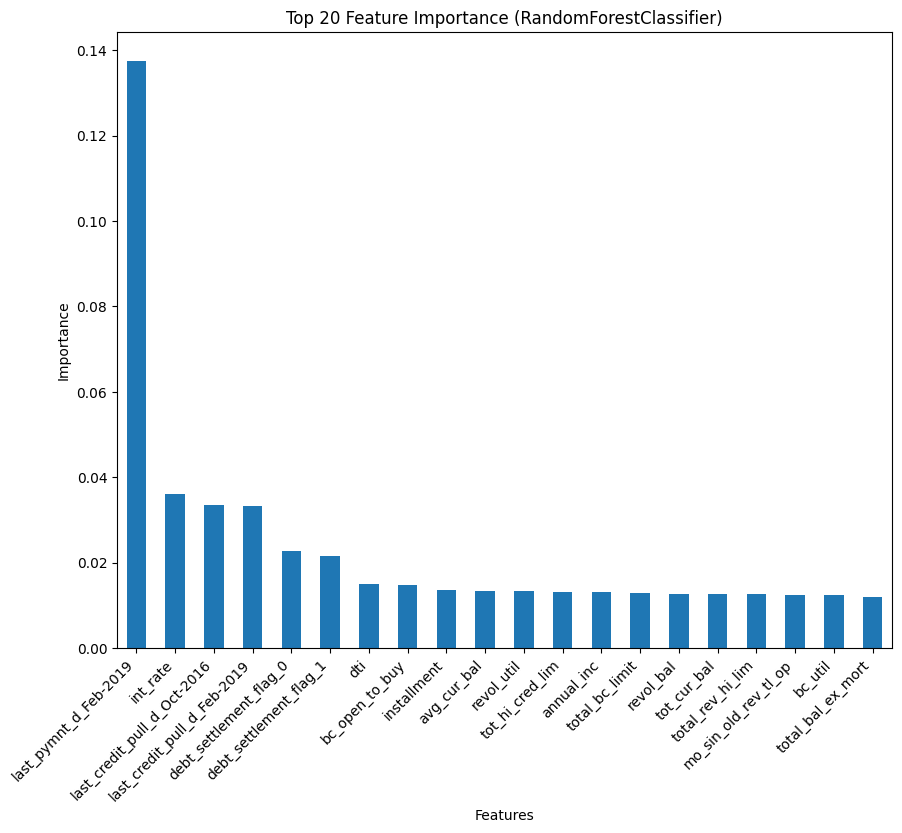

In [53]:
feature_importances = rfc.feature_importances_

feature_names = X_train.columns

importances = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

top_20_importances = importances[:20]

# Plotting
plt.figure(figsize=(10,8))
top_20_importances.plot(kind='bar')
plt.title('Top 20 Feature Importance (RandomForestClassifier)')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.show()


# From feature importance it appears that EDA analysis matches with the result of feature importance where int_rate, debt settlement flag, dti, installment and annual income are important features

In [54]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': range(1, 4, 6),
    'max_features': ['sqrt', 'log2']
}

In [55]:
# Initialize the base model
rfc = RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the training data
rfc_grid_rs_start = time.time()
random_search.fit(X_train, y_train)

rfc_grid_rs_stop = time.time()
print(f'Grid Search Time : {(rfc_grid_rs_stop - rfc_grid_rs_start): .8f}s')

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Grid Search Time :  135.19924593s


In [56]:
# Predict with the tuned model
tuned_rfc_preds = random_search.predict(X_test)
tuned_rfc_probs = random_search.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
tuned_accuracy = accuracy_score(y_test, tuned_rfc_preds)
tuned_precision = precision_score(y_test, tuned_rfc_preds)
tuned_recall = recall_score(y_test, tuned_rfc_preds)
tuned_f1 = f1_score(y_test, tuned_rfc_preds)
tuned_roc_auc = roc_auc_score(y_test, tuned_rfc_probs)


In [57]:
# Add to the model_metrics dictionary
model_metrics['RandomForest - Optimized'] = {
    'Accuracy': tuned_accuracy,
    'Precision': tuned_precision,
    'Recall': tuned_recall,
    'F1 Score': tuned_f1,
    'ROC-AUC': tuned_roc_auc
}

In [58]:
model_metrics

{'RandomForest - Baseline': {'Accuracy': 0.8235551063756895,
  'Precision': 0.856221145841217,
  'Recall': 0.7768088576087889,
  'F1 Score': 0.8145841396131657,
  'ROC-AUC': 0.9085704939235991},
 'RandomForest - Optimized': {'Accuracy': 0.7169224707937922,
  'Precision': 0.7504869807195389,
  'Recall': 0.6481332074500042,
  'F1 Score': 0.6955648689725049,
  'ROC-AUC': 0.7937734364838519}}

In [59]:
# Best parameter set found by RandomizedSearchCV
print("Best parameters:", random_search.best_params_)

# Best estimator
print("Best estimator:", random_search.best_estimator_)

Best parameters: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 1}
Best estimator: RandomForestClassifier(max_depth=1, max_features='log2', n_estimators=200,
                       n_jobs=4, random_state=42, verbose=False)


# Now building logistic regression

In [60]:
# LogisticRegression model
l_regression = LogisticRegression(max_iter=100)

In [61]:
l_regression.fit(X_train, y_train)

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
l_regression_pred = l_regression.predict(X_test)

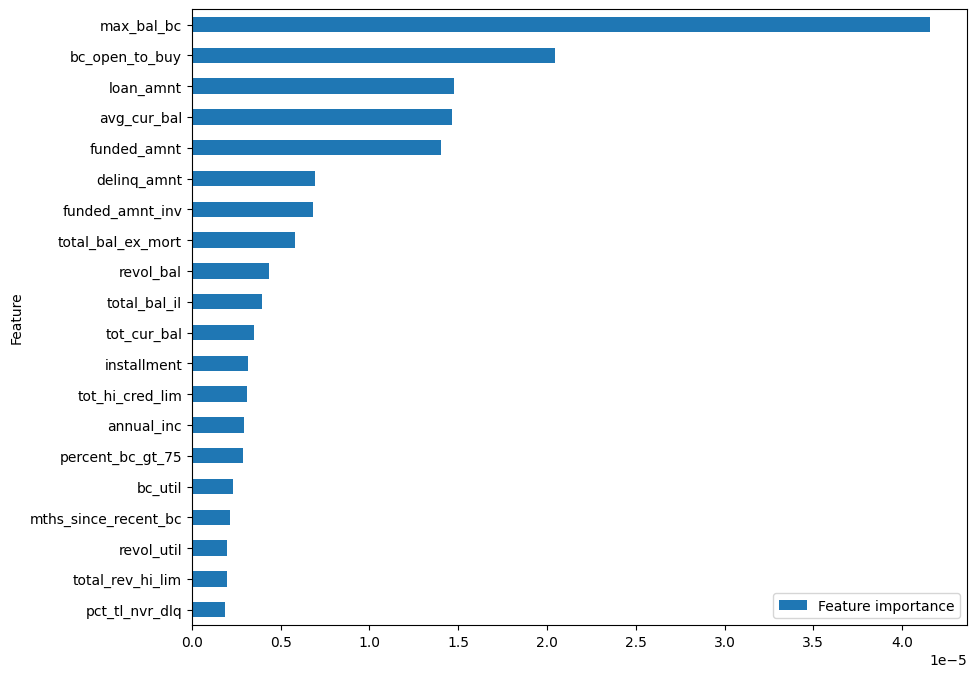

In [63]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns, 
    'Feature importance': np.abs(l_regression.coef_[0])
})

# Sorting the DataFrame by 'Feature importance' in ascending order
feature_importance = feature_importance.sort_values(by='Feature importance', ascending=True)

# Plotting the feature importances
feature_importance_top = feature_importance.tail(20)

# Plotting the top 20 important features
feature_importance_top.plot(x='Feature', y='Feature importance', kind='barh', figsize=(10, 8)).legend(loc='lower right')

plt.show()

In [64]:
accuracy_baseline = accuracy_score(y_test, l_regression_pred)
precision_baseline = precision_score(y_test, l_regression_pred)
recall_baseline = recall_score(y_test, l_regression_pred)
f1_baseline = f1_score(y_test, l_regression_pred)
roc_auc_baseline = roc_auc_score(y_test, l_regression.predict_proba(X_test)[:, 1])



In [65]:
# Store the baseline metrics
model_metrics['Logistic Regression - Baseline'] = {
    'Accuracy': accuracy_baseline,
    'Precision': precision_baseline,
    'Recall': recall_baseline,
    'F1 Score': f1_baseline,
    'ROC-AUC': roc_auc_baseline
}

In [66]:
# Define the parameter distribution
lgr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [67]:
# Setup RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    LogisticRegression(max_iter=100),
    param_distributions=lgr_params,
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    n_jobs=7
)

In [68]:
# Fit RandomizedSearchCV to the training data
lr_grid_rs_start = time.time()
random_search_lr.fit(X_train, y_train)
lr_grid_rs_stop = time.time()
print(f'RS Search Time : {(lr_grid_rs_stop - lr_grid_rs_start): .8f}s')

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

RS Search Time :  1305.70268297s


/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
# Predict with the best estimator
l_regression_tuned_pred = random_search_lr.predict(X_test)
l_regression_tuned_probs = random_search_lr.predict_proba(X_test)[:, 1]

In [70]:
# Calculate evaluation metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, l_regression_tuned_pred)
precision_tuned = precision_score(y_test, l_regression_tuned_pred)
recall_tuned = recall_score(y_test, l_regression_tuned_pred)
f1_tuned = f1_score(y_test, l_regression_tuned_pred)
roc_auc_tuned = roc_auc_score(y_test, l_regression_tuned_probs)


In [71]:
# Store the metrics for the tuned model
model_metrics['Logistic Regression - Optimized'] = {
    'Accuracy': accuracy_tuned,
    'Precision': precision_tuned,
    'Recall': recall_tuned,
    'F1 Score': f1_tuned,
    'ROC-AUC': roc_auc_tuned
}


In [72]:
print("Best Parameters:", random_search_lr.best_params_)


Best Parameters: {'penalty': 'l2', 'C': 0.001}


In [73]:
print(model_metrics)

{'RandomForest - Baseline': {'Accuracy': 0.8235551063756895, 'Precision': 0.856221145841217, 'Recall': 0.7768088576087889, 'F1 Score': 0.8145841396131657, 'ROC-AUC': 0.9085704939235991}, 'RandomForest - Optimized': {'Accuracy': 0.7169224707937922, 'Precision': 0.7504869807195389, 'Recall': 0.6481332074500042, 'F1 Score': 0.6955648689725049, 'ROC-AUC': 0.7937734364838519}, 'Logistic Regression - Baseline': {'Accuracy': 0.601510843125835, 'Precision': 0.6019717966997618, 'Recall': 0.5942837524675993, 'F1 Score': 0.5981030699860062, 'ROC-AUC': 0.6380839211692103}, 'Logistic Regression - Optimized': {'Accuracy': 0.6012795916269827, 'Precision': 0.6025771388499299, 'Recall': 0.5900094412496781, 'F1 Score': 0.5962270696907932, 'ROC-AUC': 0.6379283220575611}}


# Now building XGBoost

In [74]:
model_metrics

{'RandomForest - Baseline': {'Accuracy': 0.8235551063756895,
  'Precision': 0.856221145841217,
  'Recall': 0.7768088576087889,
  'F1 Score': 0.8145841396131657,
  'ROC-AUC': 0.9085704939235991},
 'RandomForest - Optimized': {'Accuracy': 0.7169224707937922,
  'Precision': 0.7504869807195389,
  'Recall': 0.6481332074500042,
  'F1 Score': 0.6955648689725049,
  'ROC-AUC': 0.7937734364838519},
 'Logistic Regression - Baseline': {'Accuracy': 0.601510843125835,
  'Precision': 0.6019717966997618,
  'Recall': 0.5942837524675993,
  'F1 Score': 0.5981030699860062,
  'ROC-AUC': 0.6380839211692103},
 'Logistic Regression - Optimized': {'Accuracy': 0.6012795916269827,
  'Precision': 0.6025771388499299,
  'Recall': 0.5900094412496781,
  'F1 Score': 0.5962270696907932,
  'ROC-AUC': 0.6379283220575611}}

In [75]:
# Initialize the model with default parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [76]:
# Fit the model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [77]:
# Predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

In [78]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [79]:
# Print the evaluation metrics
print("Baseline XGBoost Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Baseline XGBoost Model Performance:
Accuracy: 0.8644
Precision: 0.8701
Recall: 0.8559
F1 Score: 0.8630
ROC-AUC Score: 0.9395


In [80]:
model_metrics['GBM (XGBoost) - Baseline'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}

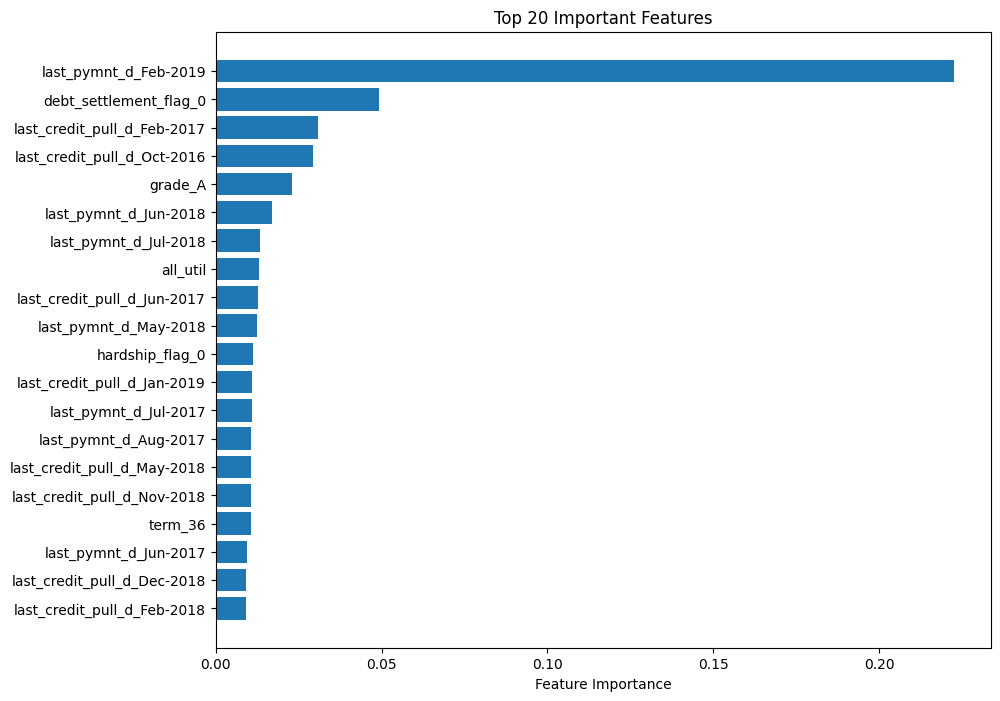

In [82]:
# Creating a DataFrame for feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns, 
    'Feature Importance': np.abs(xgb_model.feature_importances_)
})

# Sorting the DataFrame by 'Feature Importance' in ascending order
feature_importance_sorted = feature_importance.sort_values(by='Feature Importance', ascending=True)

feature_importance_top = feature_importance_sorted.tail(20)

# Plotting the top 20 important features
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_top['Feature'], feature_importance_top['Feature Importance'])
plt.xlabel('Feature Importance')
plt.title(f'Top {20} Important Features')
plt.show()

In [83]:
# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Initialize the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)

In [84]:
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 0.7, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.6}


In [85]:
# Predict with the best model
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

model_metrics['GBM (XGBoost) - Optimized'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}

print(model_metrics)

{'RandomForest - Baseline': {'Accuracy': 0.8235551063756895, 'Precision': 0.856221145841217, 'Recall': 0.7768088576087889, 'F1 Score': 0.8145841396131657, 'ROC-AUC': 0.9085704939235991}, 'RandomForest - Optimized': {'Accuracy': 0.7169224707937922, 'Precision': 0.7504869807195389, 'Recall': 0.6481332074500042, 'F1 Score': 0.6955648689725049, 'ROC-AUC': 0.7937734364838519}, 'Logistic Regression - Baseline': {'Accuracy': 0.601510843125835, 'Precision': 0.6019717966997618, 'Recall': 0.5942837524675993, 'F1 Score': 0.5981030699860062, 'ROC-AUC': 0.6380839211692103}, 'Logistic Regression - Optimized': {'Accuracy': 0.6012795916269827, 'Precision': 0.6025771388499299, 'Recall': 0.5900094412496781, 'F1 Score': 0.5962270696907932, 'ROC-AUC': 0.6379283220575611}, 'GBM (XGBoost) - Baseline': {'Accuracy': 0.8643581486176299, 'Precision': 0.8700879458365324, 'Recall': 0.8559436958201013, 'F1 Score': 0.8629578671374056, 'ROC-AUC': 0.9395162061532918}, 'GBM (XGBoost) - Optimized': {'Accuracy': 0.86879

In [86]:
# Convert the model_metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics).T
metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
RandomForest - Baseline,0.823555,0.856221,0.776809,0.814584,0.908570
RandomForest - Optimized,0.716922,0.750487,0.648133,0.695565,0.793773
Logistic Regression - Baseline,0.601511,0.601972,0.594284,0.598103,0.638084
Logistic Regression - Optimized,0.601280,0.602577,0.590009,0.596227,0.637928
GBM (XGBoost) - Baseline,0.864358,0.870088,0.855944,0.862958,0.939516
GBM (XGBoost) - Optimized,0.868795,0.873577,0.861746,0.867621,0.942461


# Observations and Results

### Random Forest:
The baseline Random Forest model showed strong performance across all metrics, with a high ROC-AUC score. However, optimization did not improve performance.
### Logistic Regression:
Both baseline and optimized Logistic Regression models showed similar performance, with modest accuracy, precision, recall, F1 score, and ROC-AUC. Optimization did not significantly alter the results.
### GBM (XGBoost):
The GBM models, both baseline and optimized, demonstrated superior performance compared to the other models. The optimized XGBoost model outperformed all others in every metric, indicating its strong predictive capability.

# Conclusion and Recommendations to Loan Companies
Given the performance metrics, the GBM (XGBoost) - Optimized model is recommended for predicting loan default. Its high accuracy, precision, recall, F1 score, and particularly its ROC-AUC score suggest it can reliably identify potential loan defaults while minimizing false positives and false negatives.

# Recommendations:

### Deploy the GBM (XGBoost) - 
Optimized model for predicting loan defaults. Its high performance suggests it will be effective in identifying risky loans.
### Continuous Monitoring: 
Even the best model can drift over time. Regularly evaluate the model's performance on new data and retrain if necessary.
### Feature Importance Review: 
Review the most influential features driving the predictions. This can provide insights into factors contributing to loan defaults, potentially guiding policy adjustments or targeted interventions.

# Next Steps

### Feature Engineering: 
Investigate additional features that could improve model performance, such as economic indicators or more granular borrower information.

### Model Deployment: 
Consider the operational aspects of deploying the model, including integration with loan application systems for real-time predictions and decision-making support.

### Regulatory Compliance: 
Ensure the model's use complies with all relevant financial regulations, including fair lending laws and privacy protections.

By following these recommendations and next steps, loan companies can enhance their ability to predict loan defaults, enabling them to make more informed lending decisions, reduce risk, and potentially offer better terms to lower-risk borrowers.





